# Matteo Zortea, Alessandro Rizzi  
## Brain Inspired Computing, Sheet 2  
## Group G3A8
## Exercises solved  
Ex 1: a) b) c)  
Ex 2: a) b)  
Ex 3: a)  
Ex 4: a)  

# Exercise 1
## a)
At time $t$ the probability of a channel beeing open is $x(t)$, hence the number of expected open channels at time $t$ is $s(t) = Nx(t)$, where $N$ is the total number of channels.  
At time $t + \Delta t$, some channels switch from opened to closed and vice-versa. This happen with the transition rates $$r_{cl \to op} = \alpha_x(u) \\ r_{op \to cl} = \beta_x(u)$$ so that the expected number of transitions from closed to opened and from opened to closed at time $t$ in a time intervals $\delta T$ are respectively $$N_{cl \to op} = (N-s(t)) \,\alpha(u) \, \Delta t = N(1-x(t)) \, \alpha(u) \, \Delta t \\ N_{op \to cl} = s(t) \, \beta(u) \, \Delta t = Nx(t) \, \beta(u) \, \Delta t$$
This means that $$s(t + \Delta t) = s(t) + N_{cl \to op} - N_{op \to cl} = s(t) + \left[ N(1-x(t)) \, \alpha(u) - Nx(t) \, \beta(u) \right] \Delta t$$
so that $$\frac{s(t+\Delta t)-s(t)}{\Delta t} = N \left[(1-x(t)) \, \alpha(u) - x(t) \, \beta(u) \right] $$
Taking the limit $\Delta t \to 0$, remembering that $s(t) = N \, x(t)$ one gets the equation for the evolution of the p.d.f. $$\frac{dx(t)}{dt} = (1-x(t)) \, \alpha(u) - x(t) \, \beta(u) = \alpha(u) - x(t) \, \left(\alpha(u) + \beta(u) \right)$$
or in short form $$\dot x = \alpha - x \left(\alpha + \beta\right) $$
## b) 
One can simply take apart $\alpha + \beta$ from the last expression
$$ \dot x = (\alpha + \beta) \left(\frac{\alpha}{\alpha + \beta} - x\right) \equiv \frac{1}{\tau} \left( x_0 - x \right)$$
so that the required transformations are $\tau = \frac{1}{\alpha + \beta}$ and $x_0 = \frac{\alpha}{\alpha + \beta}$
## c)
$$\tau(u) = \alpha(u) + \beta(u) = \frac{1}{1+e^{-\frac{u+a}{b}}} + \frac{1}{1+e^{\frac{u+a}{b}}} = \frac{e^\frac{u+a}{b}}{1+e^{\frac{u+a}{b}}} + \frac{1}{1+e^{\frac{u+a}{b}}} = 1 \\
x_0(u) = \frac{\alpha(u)}{\alpha(u)+\beta(u)} = \frac{1}{1+e^{-\frac{u+a}{b}}}$$
Now let us note that
$$1+\tanh(x) = 1 + \frac{e^{2x}-1}{e^{2x}+1} = \frac{2e^{2x}}{e^{2x}+1} = \frac{2}{1+e^{-2x}}$$
Hence we can work out the equation for $x_0(u)$ to obtain the desired expression
$$x_0(u) = \frac{1}{1+e^{-2\frac{u+a}{2b}}} = \frac{1}{2} \left[1+\tanh\left(\frac{1}{2b}(u-(-a))\right)\right] \equiv
\frac{1}{2} \left[1+\tanh\left(\beta(u-\Theta)\right)\right]$$
where we set $\Theta=-a, \beta =1/2b$

# Exercise 2



## a)

Definition of various parameters and importation of libraries

In [1]:
import numpy as np 
from matplotlib import pyplot as plt

# Parameters
dt = 0.01 # ms
T_run = 200 # ms
n0 = 0.3
m0 = 0.1
h0 = 0.6
u0 = -65 # mV

# Resting potentials
E_Na = 50 # mV
E_K = -77 # mV
E_l = -54.4 # mV
# Conductances
g_Na = 120 # muS
g_K = 36 # muS
g_l = 0.3 # muS

Cm = 1 # nF

npoints = int(T_run/dt)

It is convenient to define a function which calculates the Taylor's polynomial of the function $$f(x) = \exp(\alpha x + \beta) - 1$$ around the point $x_0 = -\beta/\alpha$. 
This will be used in the calculation of the transition coefficients when the argument of the eponential is small. Otherwise the function explodes.

In [2]:
def taylor_exp(x, alpha, beta, n):
    flag = False
    if isinstance(x, (int, float)):
        x = [x]
        flag = True
    vals = []
    powers = np.arange(1, n+1, 1)
    for xx in x:
        terms = []
        for p in range(1, n):
            terms.append((alpha*xx+beta)**p / np.math.factorial(p))
        vals.append(sum(terms))
    if flag:
        return vals[0]
    else:
        return vals

We then define the functions that calculate the transition rates, using the Taylor expansion when the argument of the exponential is lower than a treshold value. The plots follow.

In [3]:
# Transition rates
def cl_to_op(u_arr):
    u_arr = u_arr # from V to mV
    if isinstance(u_arr, (int, float)):
        u_arr = [u_arr]
    ret_arr = np.zeros((3, len(u_arr)))
    for i,u in enumerate(u_arr):
        if abs(-55-u) < 1e-2 and False:
            ret_arr[0,i] = 0.01*(-55-u)/taylor_exp(u, alpha=-0.1, beta=-5.5, n=10)
        else:
            ret_arr[0,i] = 0.01*(-55-u)/(np.exp(-5.5 - 0.1*u) - 1)
        if abs(-40-u) < 1e-2 and False:
            ret_arr[1,i] = 0.1*(-40-u)/taylor_exp(u, alpha=-0.1, beta=-4.5, n=10)
        else:
            ret_arr[1,i] = 0.1*(-40-u)/(np.exp(-4 - 0.1*u) - 1)
        ret_arr[2,i] = 0.07*np.exp(-(u+65)/20)
    return ret_arr

op_to_cl = lambda u: np.array([0.125*np.exp(-(u+65)/80), 4.0*np.exp(-(u+65)/18), 1/(np.exp(-3.5-0.1*u) + 1)])


# x0, tau
get_x0 = lambda u: cl_to_op(u)/(cl_to_op(u)+op_to_cl(u))
get_tau = lambda u: 1/(cl_to_op(u) + op_to_cl(u))

NameError: name 'axT' is not defined

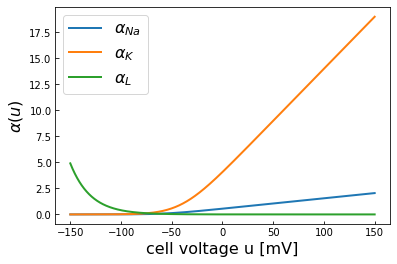

In [4]:
uline = np.linspace(-150, 150, 10000) # x ticks [mV] to plot the transition rates
a = cl_to_op(uline)
plt.plot(uline, a[0,:], label=r"$\alpha_{Na}$", lw=2)
plt.plot(uline, a[1,:], label=r"$\alpha_{K}$", lw=2)
plt.plot(uline, a[2,:], label=r"$\alpha_{L}$", lw=2)
plt.xlabel("cell voltage u [mV]", fontsize=16)
plt.ylabel(r"$\alpha(u)$", fontsize=16)
plt.legend(fontsize=16)
ax = plt.gca()
ax.tick_params(direction='in')
axT.tick_params(direction='in')
axR.tick_params(direction='in')
plt.show()

uline = np.linspace(-75, 75, 10000) # x ticks [mV] to plot the transition rates
b = op_to_cl(uline)
plt.plot(uline, b[0,:], label=r"$\beta_{Na}$", lw=2)
plt.plot(uline, b[1,:], label=r"$\beta_{K}$", lw=2)
plt.plot(uline, b[2,:], label=r"$\beta_{L}$", lw=2)
plt.xlabel("cell voltage u [mV]", fontsize=16)
plt.ylabel(r"$\beta(u)$", fontsize=16)
plt.legend(fontsize=16)
ax=plt.gca()
ax.tick_params(direction='in')
axT.tick_params(direction='in')
axR.tick_params(direction='in')
plt.show()


Input current function

In [ ]:
def I_ext(t):
    I = []
    for tt in t:
        if tt > 100 and tt < 150:
            I.append(7.5)
        else:
            I.append(0)
    return I

Right hand sides of the differential equations

In [ ]:
def xdot(x, u, n):
    return (1/tau[n]) * (x0[n] - x)
def udot(u, t, n, m, h):
    return (g_l*(E_l - u) + g_Na*m**3*h*(E_Na - u) + g_K*n**4*(E_K - u) + I_ext(t))/Cm

We have to solve the differential equations
$$
\begin{cases}
\frac{dn}{dt} = \frac{1}{\tau_n(u)} \left(n_0(u) - n(u)\right) \\
\frac{dm}{dt} = \frac{1}{\tau_m(u)} \left(m_0(u) - m(u)\right) \\
\frac{dh}{dt} = \frac{1}{\tau_h(u)} \left(h_0(u) - h(u)\right) \\
C_m \frac{du}{dt} = g_L \left(E_L - u\right) + g_{Na} m^3h \left(E_{Na} - u\right) + g_K n^4 \left(E_K-u\right) + I_{ext(t)}
\end{cases}
$$
The system of equations can be efficiently integrated using the leapfrog kick-drift-kick method obtaining a numerical accuracy of order 2, using the same number of evaluations of the Euler method

In [ ]:
t = np.zeros((npoints, 1))
x = np.zeros((npoints, 3))
u = np.zeros((npoints, 1))
t[0] = 0
x[0,:] = [n0, m0, h0]
u[0] = u0
for i in range(npoints - 1):
    tau = get_tau(u[i])
    x0 = get_x0(u[i])
    u[i+1] = u[i] + dt*udot(u[i], t[i], x[i,0], x[i,1], x[i,2])
    for n in range(3):
        x[i+1,n] = x[i,n] + dt*xdot(x[i,n], u[i+1], n)   
    t[i+1] = t[i] + dt

Plotting the potential and the input current

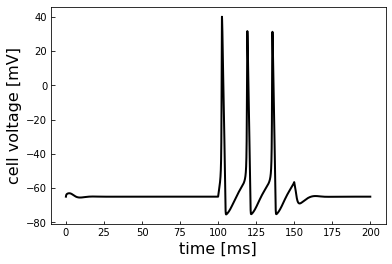

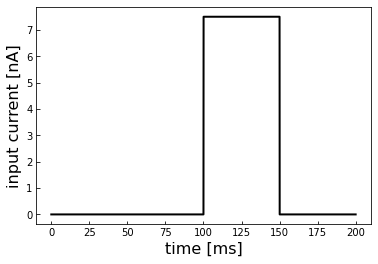

In [ ]:
plt.plot(t, u, lw=2, color='black')
plt.xlabel('time [ms]', fontsize=16)
plt.ylabel('cell voltage [mV]', fontsize=16)
ax = plt.gca()
ax.tick_params(direction='in')
plt.show()

plt.plot(t, I_ext(t), lw=2, color='black')
plt.xlabel('time [ms]', fontsize=16)
plt.ylabel('input current [nA]', fontsize=16)
ax = plt.gca()
ax.tick_params(direction='in')
plt.show()

## b)

Let us now use the other input current

In [ ]:
def I_ext(t):
    I = []
    for tt in t:
        if tt > 100 and tt < 130:
            I.append(-3)
        else:
            I.append(0)
    return I

In [ ]:
t = np.zeros((npoints, 1))
x = np.zeros((npoints, 3))
u = np.zeros((npoints, 1))
t[0] = 0
x[0,:] = [n0, m0, h0]
u[0] = u0
for i in range(npoints - 1):
    tau = get_tau(u[i])
    x0 = get_x0(u[i])
    u[i+1] = u[i] + dt*udot(u[i], t[i], x[i,0], x[i,1], x[i,2])
    for n in range(3):
        x[i+1,n] = x[i,n] + dt*xdot(x[i,n], u[i+1], n)   
    t[i+1] = t[i] + dt

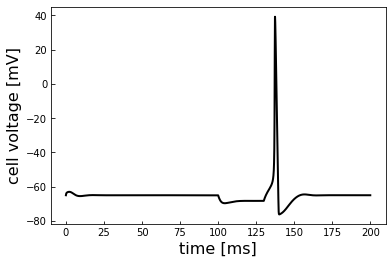

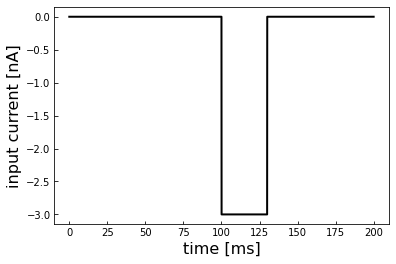

In [ ]:
plt.plot(t, u, lw=2, color='black')
plt.xlabel('time [ms]', fontsize=16)
plt.ylabel('cell voltage [mV]', fontsize=16)
ax = plt.gca()
ax.tick_params(direction='in')
plt.show()

plt.plot(t, I_ext(t), lw=2, color='black')
plt.xlabel('time [ms]', fontsize=16)
plt.ylabel('input current [nA]', fontsize=16)
ax = plt.gca()
ax.tick_params(direction='in')
plt.show()

# Exercise 3

## a)
With a constant value of the external current, we can solve the differential equation for the membrane potential $u$:
$$C_m \frac{du}{dt} = g_l(E_l-u)+I_\text{ext}$$
We proceed separing the variables:
$$\frac{du}{u-E_l-I_\text{ext}/g_l} = 
-

# Exercise 3

With a constant value of the external current, we can solve the differential equation for the membrane potential $u$:
$$C_m \frac{du}{dt} = g_l(E_l-u)+I_\text{ext}.$$
We proceed separing the variables
$$\frac{du}{u-E_l-I_\text{ext}/g_l} = - \frac{g_l}{C_m}dt,$$
and then integrating both sides we obtain the solution $u(t)$:
$$u(t) = E_l+\frac{I_\text{ext}}{g_l} + Ae^{-\frac{t}{\tau_m}},$$
where A is a constant to be determined by the initial conditions, and $\tau_m = C_m/g_l$ is the membrane time constant.

We want to calculate the firing rate, i.e. the number of spikes per time unit of the neuron. To simplify our task, we choose to set the origin of time $t=0$ immeadeatly after a spike, i.e. we apply the initial condition $u(0) = E_\text{reset}$. With this condition we find that $A = E_\text{reset} - E_l - I_\text{ext}/g_l$.

We now want to compute the time $\tau_\text{spike}$ needed to elicit a spike, i.e. to reach the treshold value $\Theta$. 
$$ u(\tau_\text{spike}) = \Theta \xrightarrow{} \tau_\text{spike} = -\tau_m \ln\Biggl(\frac{\Theta-E_l-I_\text{ext}/g_l}{E_\text{reset}-E_l - I_\text{ext}/g_l}\Biggr)$$
In the LIF neuron, after having reached the treshold, it follows an absolute refractary period $\tau_\text{ref}$, and then we are again at $u = E_\text{reset}$, and the mechanism repeat. Thus, the firing rate is:
$$\nu(I_\text{ext}) = \frac{1}{\tau_\text{ref}+\tau_\text{spike}} = \Biggl[\tau_\text{ref} + \tau_m \ln\Biggl(\frac{\Theta-E_l-I_\text{ext}/g_l}{E_\text{reset}-E_l - I_\text{ext}/g_l}\Biggr) \Biggr]^{-1} $$


# Exercise 4
Setting $\tau_\text{ref} = 0$ and expanding the logarithm at the second order, we obtain:
$$
\nu_\text{asy}(I_\text{ext}) \sim
\frac{1}{\tau_m} \Biggl[ \frac{g_l}{I_\text{ext}}(\Theta- E_\text{reset}) - 
\frac{g_l^2}{I_\text{ext}^2} \Biggl( E_\text{reset}^2 - \Theta^2 +2E_l(\Theta-E_\text{reset})\Biggr) + o\Biggl(\frac{1}{I_\text{ext}^2}\Biggr) \Biggr]^{-1} = \\
= \frac{1}{\tau_m (\Theta- E_\text{reset})}\frac{I_\text{ext}}{g_l} 
\Biggl[ 1 -  \frac{g_l}{I_\text{ext}}  \frac{E_\text{reset}^2 - \Theta^2 +2E_l(\Theta-E_\text{reset})}{\Theta- E_\text{reset}} + o\Biggl(\frac{1}{I_\text{ext}}\Biggr) \Biggr]^{-1}
$$
Expanding now the denominator at the first order we find the result:
$$
\nu_\text{asy}(I_\text{ext}) \sim \frac{1}{\tau_m (\Theta- E_\text{reset})}\frac{I_\text{ext}}{g_l} + \frac{E_\text{reset}^2 - \Theta^2 +2E_l(\Theta-E_\text{reset})}{\tau_m(\Theta- E_\text{reset})^2}
$$
